# Complexity Measures

This notebooks runs complexity metrics on time series signals. 

This notebook includes:
- Hjorth parameters
- Lempel-Ziv complexity

In [1]:
import numpy as np

from neurodsp.sim import sim_powerlaw, sim_synaptic_current, sim_combined
from neurodsp.utils import set_random_seed

from antropy import lziv_complexity

In [2]:
# Import custom code
import sys; from pathlib import Path
sys.path.append(str(Path('..').resolve()))

from apm.io import APMDB
from apm.run import run_sims_load
from apm.run import run_sims_parallel as run_sims
from apm.methods import hjorth_activity, hjorth_mobility, hjorth_complexity, lempelziv
from apm.methods.settings import HJA_PARAMS, HJM_PARAMS, HJC_PARAMS, LZ_PARAMS
from apm.plts.sims import plot_ap_sims, plot_pe_sims, plot_sims_two
from apm.plts.settings import COLORS
from apm.plts.utils import figsaver
from apm.sim.examples import get_examples, check_examples
from apm.sim.settings import N_SIMS
from apm.sim.defs import SIM_ITERS

In [3]:
import seaborn as sns
sns.set_context('talk')

## Settings

In [4]:
# Settings for saving figures
SAVE_FIG = True
FIGPATH = APMDB().figs_path / '24_complexity'

# Create helper function to manage figsaver settings
fsaver = figsaver(SAVE_FIG, FIGPATH)

In [5]:
# Settings for loading simulations
SIMPATH = APMDB().sims_path / 'time_series'

In [6]:
# Define structure for precomputed simulation file name
sim_file = 'ts_sims_{}_' + str(SIM_ITERS.fs)

In [7]:
# Set the random seed
set_random_seed(111)

In [8]:
# Define collection of example signals
examples = get_examples()

## Hjorth Parameters 

Hjorth parameters are statistical properties that can be used to characterize EEG data.

The Hjorth measures are:
- activity: represents the signal power, computed as the variance of the time series
- mobility: represents the mean frequency of the power spectrum
- complexity: represents the change in frequency

In [9]:
# Check Hjorth measure parameters
print(HJM_PARAMS)
print(HJC_PARAMS)

{}
{}


### Compute Hjorth Parameters on Examples Signals

Note that the simulated signals are normalized to a variance of one, which is why the Hjorth activity is the same for all.

#### Powerlaw Signal

In [10]:
# Check the calculated Hjorth activity values across some example signals
check_examples(examples, hjorth_activity, HJA_PARAMS, 'Hjorth Activity')

Computed Hjorth Activity:
  powerlaw       : 	 1.0000
  synaptic       : 	 1.0000
  knee           : 	 1.0000
  oscillation    : 	 1.0000
  burst          : 	 0.4933
  combined       : 	 1.0000
  comb_burst     : 	 1.0000
  comb_peak      : 	 1.0000


In [11]:
# Check the calculated Hjorth mobility values across some example signals
check_examples(examples, hjorth_mobility, HJM_PARAMS, 'Hjorth Mobility')

Computed Hjorth Mobility:
  powerlaw       : 	 0.7830
  synaptic       : 	 0.8149
  knee           : 	 0.5909
  oscillation    : 	 0.2507
  burst          : 	 0.2507
  combined       : 	 0.6530
  comb_burst     : 	 0.7008
  comb_peak      : 	 0.6630


In [12]:
# Check the calculated Hjorth mobility values across some example signals
check_examples(examples, hjorth_complexity, HJC_PARAMS, 'Hjorth Complexity')

Computed Hjorth Complexity:
  powerlaw       : 	 2.0246
  synaptic       : 	 1.8788
  knee           : 	 2.3371
  oscillation    : 	 1.0003
  burst          : 	 1.2211
  combined       : 	 2.3870
  comb_burst     : 	 2.2392
  comb_peak      : 	 2.3492


### Hjorth Parameters: Aperiodic Variations

In [13]:
# Run simulations calculating Hjorth measures across exponents
hjm_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], hjorth_mobility, HJM_PARAMS, N_SIMS)
hjc_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], hjorth_complexity, HJC_PARAMS, N_SIMS)

In [14]:
# Run simulations calculating Hjorth measures across exponents with an oscillation
hjm_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], hjorth_mobility, HJM_PARAMS, N_SIMS)
hjc_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], hjorth_complexity, HJC_PARAMS, N_SIMS)

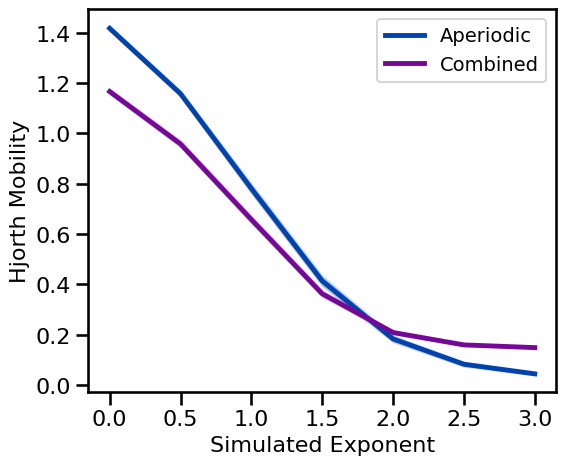

In [15]:
# Plot Hjorth mobility estimates across aperiodic variations
plot_ap_sims(hjm_sims_exp, hjm_sims_comb, 'Hjorth Mobility', **fsaver('hjm_ap'))

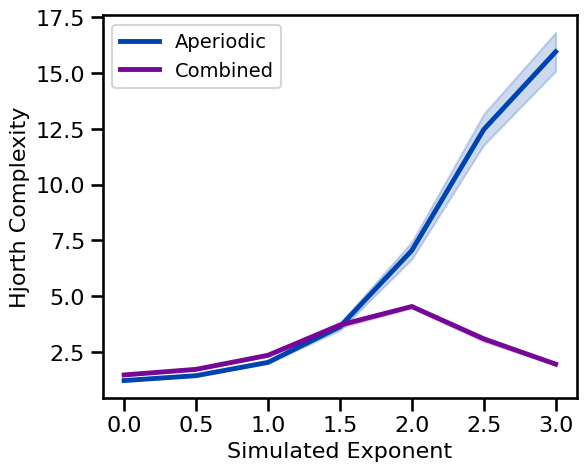

In [16]:
# Plot Hjorth complexity estimates across aperiodic variations
plot_ap_sims(hjc_sims_exp, hjc_sims_comb, 'Hjorth Complexity', **fsaver('hjc_ap'))

### Hjorth Parameters: Periodic Variations

In [17]:
# Run simulations calculating Hjorth estimates across oscillation frequency
hjm_sims_freq = run_sims(\
    sim_combined, SIM_ITERS['osc_freq'], hjorth_mobility, HJM_PARAMS, N_SIMS)
hjc_sims_freq = run_sims(\
    sim_combined, SIM_ITERS['osc_freq'], hjorth_complexity, HJC_PARAMS, N_SIMS)

In [18]:
# Run simulations calculating Hjorth estimates across oscillation power
hjm_sims_pow = run_sims(\
    sim_combined, SIM_ITERS['osc_pow'], hjorth_mobility, HJM_PARAMS, N_SIMS)
hjc_sims_pow = run_sims(\
    sim_combined, SIM_ITERS['osc_pow'], hjorth_complexity, HJC_PARAMS, N_SIMS)

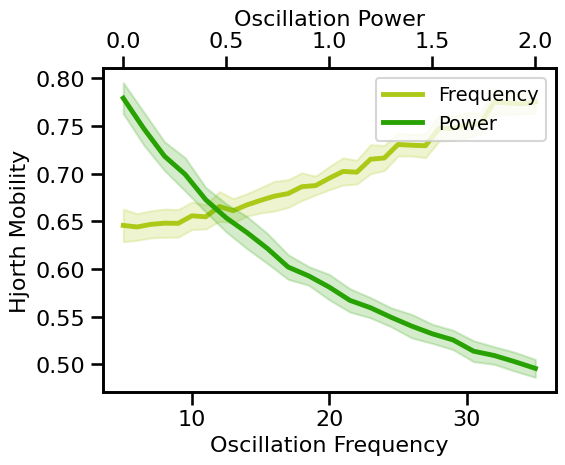

In [19]:
# Plot Hjorth mobility estimates across periodic variations
plot_pe_sims(hjm_sims_freq, hjm_sims_pow, 'Hjorth Mobility', **fsaver('hjm_pe'))

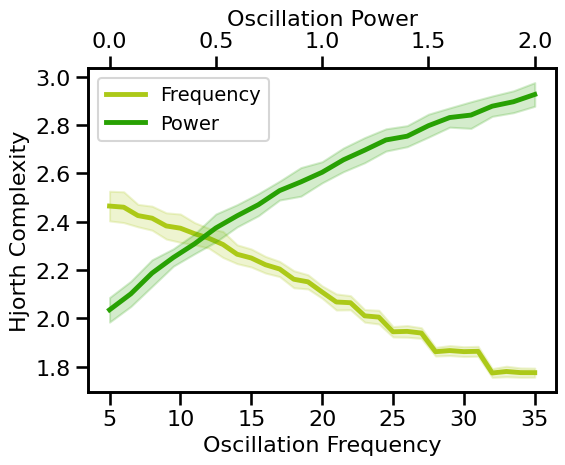

In [20]:
# Plot Hjorth complexity estimates across periodic variations
plot_pe_sims(hjc_sims_freq, hjc_sims_pow, 'Hjorth Complexity',  **fsaver('hjc_pe'))

### Hjorth Parameters: Knee Variations

In [21]:
# Run simulations calculating Hjorth measures across different timescales
hjm_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'],
                            hjorth_mobility, HJM_PARAMS, N_SIMS)
hjc_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'],
                            hjorth_complexity, HJC_PARAMS, N_SIMS)

In [22]:
# Run simulations calculating Hjorth measures across different knee parameters (sims from file)
hjm_sims_knee = run_sims_load(SIMPATH / sim_file.format('ap_knee'), hjorth_mobility, HJM_PARAMS)
hjc_sims_knee = run_sims_load(SIMPATH / sim_file.format('ap_knee'), hjorth_complexity, HJC_PARAMS)

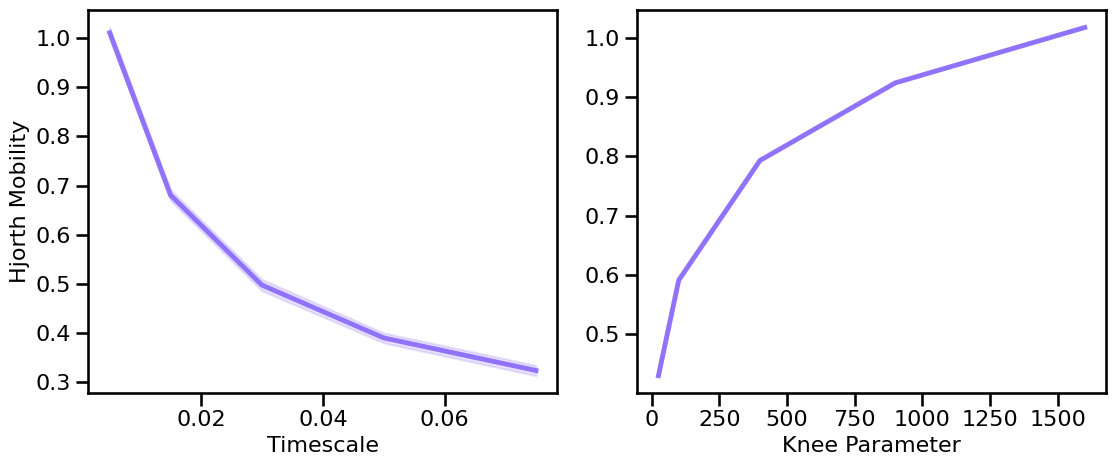

In [23]:
# Plot the estimated Hjorth mobility across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, hjm_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, hjm_sims_knee, 'Knee Parameter',
              ylabel='Hjorth Mobility', color=COLORS['KN'], **fsaver('hjm_kn_vars'))

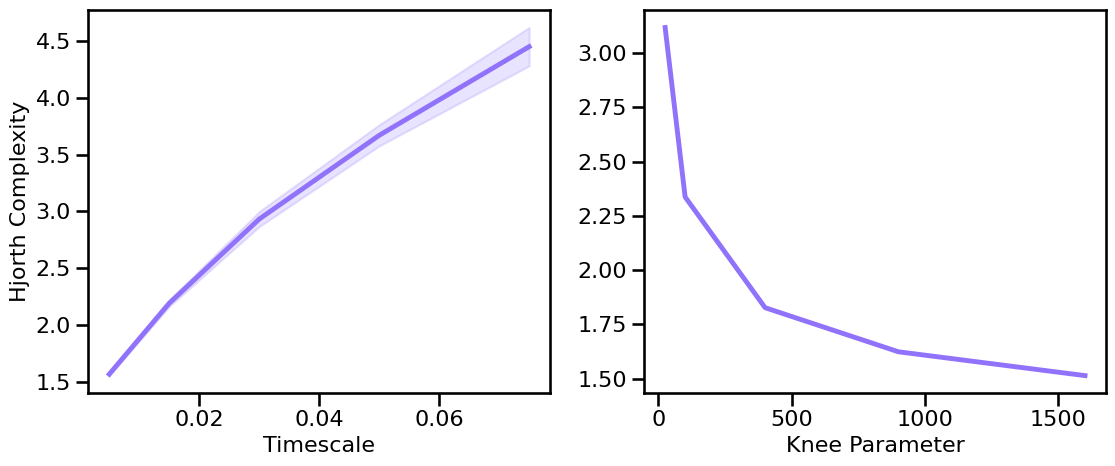

In [24]:
# Plot the estimated Hjorth complexity across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, hjc_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, hjc_sims_knee, 'Knee Parameter',
              ylabel='Hjorth Complexity', color=COLORS['KN'], **fsaver('hjc_kn_vars'))

### Hjorth Parameters: Peak Variations

In [25]:
# Run simulations calculating Hjorth measures across peak bandwidth (sims from file)
hjm_sims_bw = run_sims_load(SIMPATH / sim_file.format('comb_bw'), hjorth_mobility, HJM_PARAMS)
hjc_sims_bw = run_sims_load(SIMPATH / sim_file.format('comb_bw'), hjorth_complexity, HJC_PARAMS)

In [26]:
# Run simulations calculating Hjorth measures across burst probabilities
hjm_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'],
                          hjorth_mobility, HJM_PARAMS, N_SIMS)
hjc_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'],
                          hjorth_complexity, HJC_PARAMS, N_SIMS)

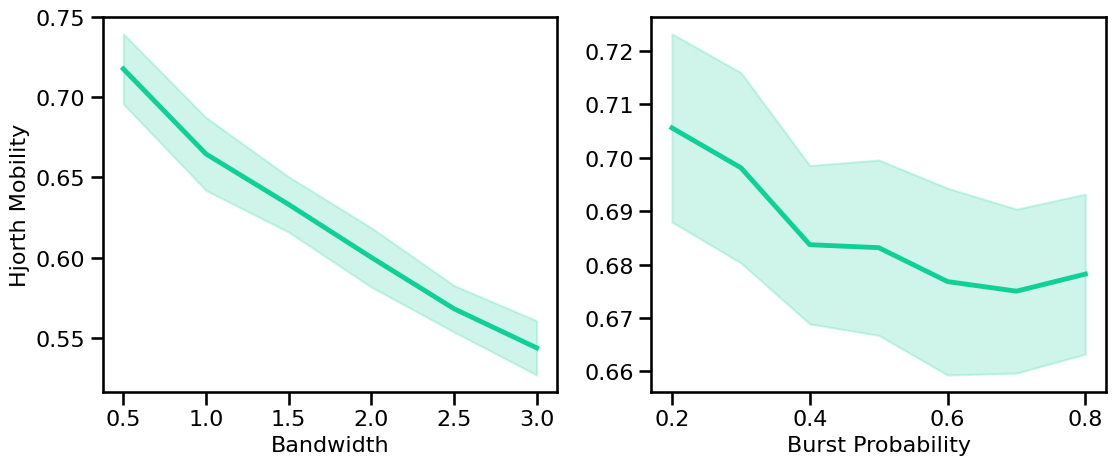

In [27]:
# Plot the estimated Hjoth mobility across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, hjm_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, hjm_sims_burst, 'Burst Probability',
              ylabel='Hjorth Mobility', color=COLORS['BW'], **fsaver('hjm_pe_vars'))

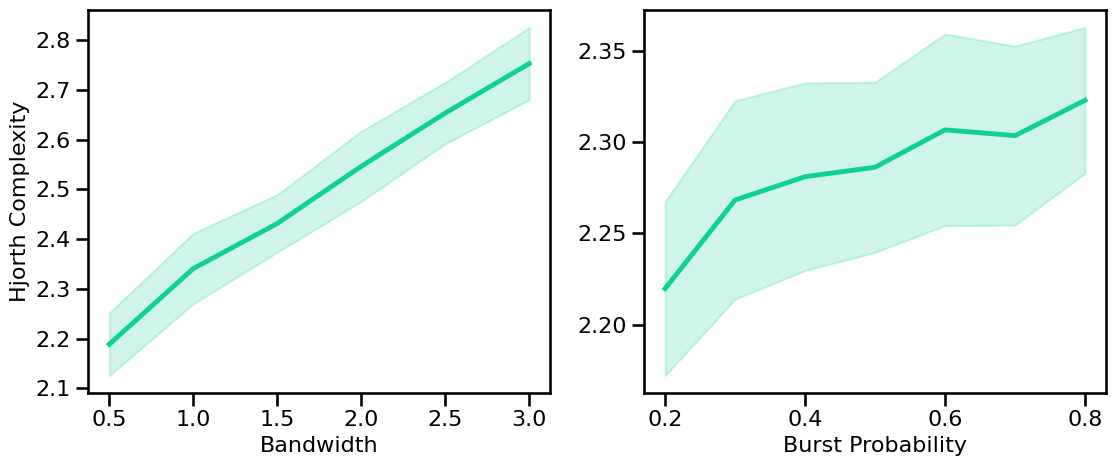

In [28]:
# Plot the estimated Hjoth complexity across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, hjc_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, hjc_sims_burst, 'Burst Probability',
              ylabel='Hjorth Complexity', color=COLORS['BW'], **fsaver('hjc_pe_vars'))

## Lempel-Ziv Complexity

Lempel-Ziv (LZ) complexity is a measure of the complexity of a time series that is sometimes applied to EEG data. 

Note that the LZ algorithm is defined for binary sequences. 

To apply this measure to neural time series, we binarize the signal by calculating whether each point is above or below the median of the time series.

In [29]:
# Check Lempel-Ziv complexity parameters
LZ_PARAMS

{'normalize': False}

In [30]:
# Example of applying LZ complexity to a binarized signal
bin_sig = np.array(examples['powerlaw'] > np.median(examples['powerlaw'])).astype(int)
lziv_complexity(bin_sig)

473

### Calculating Lempel-Ziv Complexity on Example Signals

In [31]:
# Check Lempel-Ziv complexity measures on example signals
check_examples(examples, lempelziv, LZ_PARAMS, 'Lempel Ziv Complexity')

Computed Lempel Ziv Complexity:
  powerlaw       : 	 473.0000
  synaptic       : 	 489.0000
  knee           : 	 415.0000
  oscillation    : 	 5.0000
  burst          : 	 33.0000
  combined       : 	 417.0000
  comb_burst     : 	 443.0000
  comb_peak      : 	 422.0000


### Aperiodic Variations

In [32]:
# Run simulations calculating LZ complexity across exponents
lz_sims_exp = run_sims(sim_powerlaw, SIM_ITERS['ap_exp'], lempelziv, LZ_PARAMS, N_SIMS)

In [33]:
# Run simulations calculating LZ complexity across exponents with an oscillation
lz_sims_comb = run_sims(sim_combined, SIM_ITERS['comb_exp'], lempelziv, LZ_PARAMS, N_SIMS)

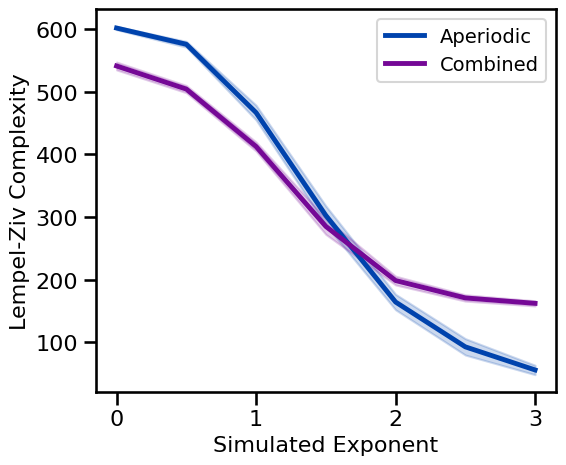

In [34]:
# Plot Lempel-Ziv complexity estimates across aperiodic variations
plot_ap_sims(lz_sims_exp, lz_sims_comb, 'Lempel-Ziv Complexity', **fsaver('lz_ap'))

### Periodic Variations

In [35]:
# Run simulations calculating LZ complexity across oscillation frequency
lz_sims_freq = run_sims(sim_combined, SIM_ITERS['osc_freq'], lempelziv, LZ_PARAMS, N_SIMS)

In [36]:
# Run simulations calculating LZ complexity dimension across oscillation power
lz_sims_pow = run_sims(sim_combined, SIM_ITERS['osc_pow'], lempelziv, LZ_PARAMS, N_SIMS)

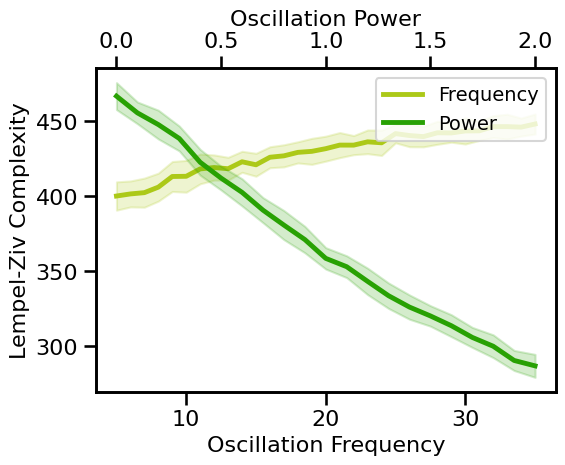

In [37]:
# Plot Lempel-Ziv complexity estimates across periodic variations
plot_pe_sims(lz_sims_freq, lz_sims_pow, 'Lempel-Ziv Complexity', **fsaver('lz_pe'))

### Knee Variations

In [38]:
# Run simulations calculating LZ Complexity across different timescales
lz_sims_tscales = run_sims(sim_synaptic_current, SIM_ITERS['syn_tscales'],
                           lempelziv, LZ_PARAMS, N_SIMS)

In [39]:
# Run simulations calculating LZ Complexity across different knee parameters (sims from file)
lz_sims_knee = run_sims_load(SIMPATH / sim_file.format('ap_knee'), lempelziv, LZ_PARAMS)

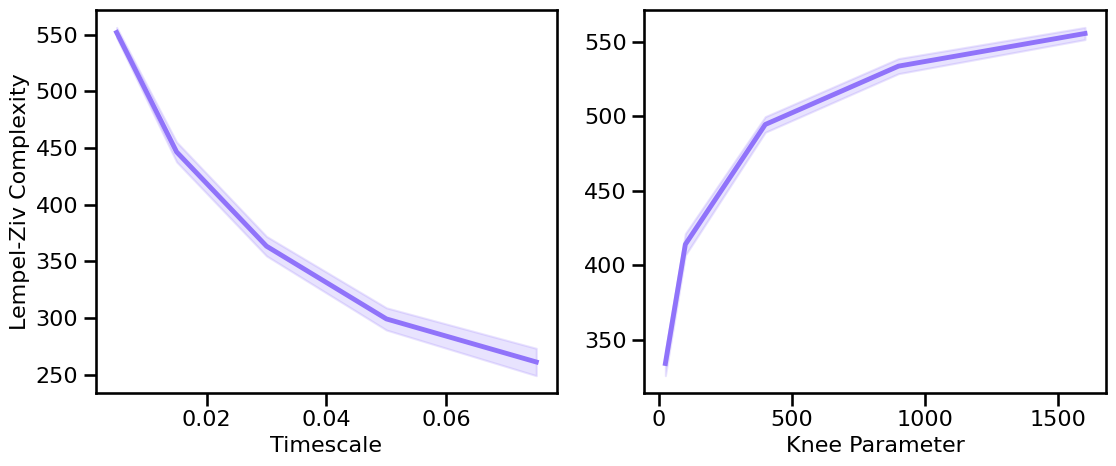

In [40]:
# Plot the estimated DFA Exponent across different timescales & knees
plot_sims_two(SIM_ITERS['syn_tscales'].values, lz_sims_tscales, 'Timescale',
              SIM_ITERS['kn_knee'].values, lz_sims_knee, 'Knee Parameter',
              ylabel='Lempel-Ziv Complexity', color=COLORS['KN'], **fsaver('lz_kn_vars'))

### Bandwidth Variations

In [41]:
# Run simulations calculating LZ Complexity across peak bandwidth (sims from file)
lz_sims_bw = run_sims_load(SIMPATH / sim_file.format('comb_bw'), lempelziv, LZ_PARAMS)

In [42]:
# Run simulations calculating LZ Complexity across burst probabilities
lz_sims_burst = run_sims(sim_combined, SIM_ITERS['comb_burst'], lempelziv, LZ_PARAMS, N_SIMS)

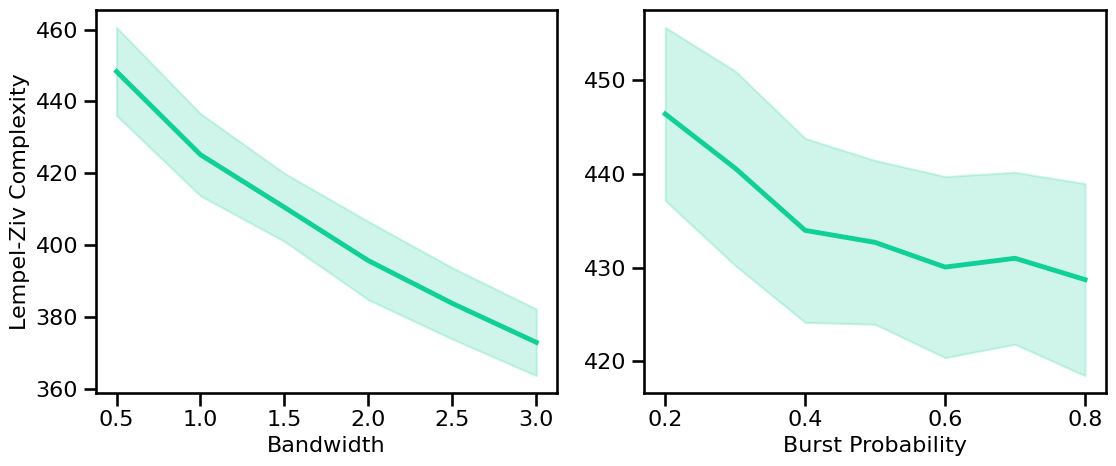

In [43]:
# Plot the estimated DFA Exponent across periodic variations
plot_sims_two(SIM_ITERS['peak_bw'].values, lz_sims_bw, 'Bandwidth',
              SIM_ITERS['comb_burst'].values, lz_sims_burst, 'Burst Probability',
              ylabel='Lempel-Ziv Complexity', color=COLORS['BW'], **fsaver('lz_pe_vars'))

## Conclusions

Overall, we can see the following patterns in these simulations:

Hjorth Parameters:
- mobility increases with decreasing aperiodic exponent (non-linearly) & increases with oscillation frequency & power
- complexity decreases with decreasing aperiodic exponent (non-linearly) & decreases with oscillation frequency & power

Lempel-Ziv Complexity:
- increases with decreasing aperiodic exponent, non-linearly
- increases with increasing oscillation frequency, approximately linearly
- decreases with increasing oscillation power, approximately linearly